# price optimization

In [1]:
# importing libraries

In [2]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [3]:
import warnings
warnings.filterwarnings("ignore")

#Math and Vectors
import pandas as pd
import numpy as np

#Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#ML
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
## Exploring Data

In [5]:
df = pd.read_csv('retail_price.csv')
df

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.950000,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.900000
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.950000,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.950000
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.950000,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.950000
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.950000,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.950000
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.950000,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,bed5,bed_bath_table,01-05-2017,1,215.00,8.760000,215.000000,56,162,5,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,214.950000
672,bed5,bed_bath_table,01-06-2017,10,2090.00,21.322000,209.000000,56,162,5,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,215.000000
673,bed5,bed_bath_table,01-07-2017,59,12095.00,22.195932,205.000000,56,162,5,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,209.000000
674,bed5,bed_bath_table,01-08-2017,52,10375.00,19.412885,199.509804,56,162,5,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,205.000000


In [6]:
# pre-processing

In [7]:
df.shape

(676, 30)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [9]:
df.describe()

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,...,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,14.495562,1422.708728,20.682270,106.496800,48.720414,767.399408,1.994083,1847.498521,4.085503,81.028107,...,79.452054,4.159467,18.597610,92.930079,4.123521,18.620644,84.182642,4.002071,17.965007,107.399684
std,15.443421,1700.123100,10.081817,76.182972,9.420715,655.205015,1.420473,2274.808483,0.232021,62.055560,...,47.933358,0.121652,9.406537,49.481269,0.207189,6.424174,47.745789,0.233292,5.533256,76.974657
min,1.000000,19.900000,0.000000,19.900000,29.000000,100.000000,1.000000,100.000000,3.300000,1.000000,...,19.900000,3.700000,0.095439,19.900000,3.300000,4.410000,19.900000,3.500000,7.670000,19.850000
25%,4.000000,333.700000,14.761912,53.900000,40.000000,339.000000,1.000000,348.000000,3.900000,34.000000,...,49.910000,4.100000,13.826429,53.900000,4.100000,14.485000,53.785714,3.900000,15.042727,55.668750
50%,10.000000,807.890000,17.518472,89.900000,51.000000,501.000000,1.500000,950.000000,4.100000,62.000000,...,69.900000,4.200000,16.618984,89.990000,4.200000,16.811765,59.900000,4.000000,16.517110,89.900000
75%,18.000000,1887.322500,22.713558,129.990000,57.000000,903.000000,2.000000,1850.000000,4.200000,116.000000,...,104.256549,4.200000,19.732500,117.888889,4.200000,21.665238,99.990000,4.100000,19.447778,129.990000
max,122.000000,12095.000000,79.760000,364.000000,60.000000,3006.000000,8.000000,9750.000000,4.500000,339.000000,...,349.900000,4.500000,57.230000,349.900000,4.400000,57.230000,255.610000,4.400000,57.230000,364.000000


In [10]:
df.dtypes

product_id                     object
product_category_name          object
month_year                     object
qty                             int64
total_price                   float64
freight_price                 float64
unit_price                    float64
product_name_lenght             int64
product_description_lenght      int64
product_photos_qty              int64
product_weight_g                int64
product_score                 float64
customers                       int64
weekday                         int64
weekend                         int64
holiday                         int64
month                           int64
year                            int64
s                             float64
volume                          int64
comp_1                        float64
ps1                           float64
fp1                           float64
comp_2                        float64
ps2                           float64
fp2                           float64
comp_3      

In [11]:
df.columns

Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price'],
      dtype='object')

In [12]:
df.nunique()

product_id                     52
product_category_name           9
month_year                     20
qty                            66
total_price                   573
freight_price                 653
unit_price                    280
product_name_lenght            24
product_description_lenght     46
product_photos_qty              7
product_weight_g               45
product_score                  11
customers                      94
weekday                         4
weekend                         3
holiday                         5
month                          12
year                            2
s                             450
volume                         40
comp_1                         88
ps1                             9
fp1                           179
comp_2                        123
ps2                            10
fp2                           242
comp_3                        105
ps3                             9
fp3                           229
lag_price     

# Feature Extraction

In [13]:
df["qty"].sum()

9799

In [14]:
df["total_price"].sum()

961751.0999999999

In [15]:
df.count()

product_id                    676
product_category_name         676
month_year                    676
qty                           676
total_price                   676
freight_price                 676
unit_price                    676
product_name_lenght           676
product_description_lenght    676
product_photos_qty            676
product_weight_g              676
product_score                 676
customers                     676
weekday                       676
weekend                       676
holiday                       676
month                         676
year                          676
s                             676
volume                        676
comp_1                        676
ps1                           676
fp1                           676
comp_2                        676
ps2                           676
fp2                           676
comp_3                        676
ps3                           676
fp3                           676
lag_price     

# Calculate Revenue and Profit

In [16]:
df["revenue"] = df["qty"] * df["total_price"]
df["profit"] = df["revenue"] - df["freight_price"]

# Calculate Margin

In [17]:
df["margin"] = (df["profit"] / df["revenue"]) * 100

# Price Ratios

In [18]:
df["price_ratio_1"] = df["unit_price"] / df["comp_1"]
df["price_ratio_2"] = df["unit_price"] / df["comp_2"]
df["price_ratio_3"] = df["unit_price"] / df["comp_3"]

# Price Differences

In [19]:
df["price_diff_1"] = df["unit_price"] - df["comp_1"]
df["price_diff_2"] = df["unit_price"] - df["comp_2"]
df["price_diff_3"] = df["unit_price"] - df["comp_3"]

In [20]:
df.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,lag_price,revenue,profit,margin,price_ratio_1,price_ratio_2,price_ratio_3,price_diff_1,price_diff_2,price_diff_3
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,45.90,45.95,30.850000,67.138194,0.511123,0.213721,1.0,-43.95,-169.050000,0.0
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,45.95,413.55,400.616667,96.872607,0.511123,0.219856,1.0,-43.95,-163.050000,0.0
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,45.95,1654.20,1639.360000,99.102890,0.511123,0.224146,1.0,-43.95,-159.050000,0.0
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,45.95,735.20,720.912500,98.056651,0.511123,0.230314,1.0,-43.95,-153.559804,0.0
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,45.95,183.80,168.700000,91.784548,0.511123,0.281214,1.0,-43.95,-117.448710,0.0


In [21]:
# Market Demand Indicators

In [22]:
df['customer_score_ratio'] = df['customers'] / df['product_score']
df['customer_photo_ratio'] = df['customers'] / df['product_photos_qty']
df['description_length_ratio'] = df['product_description_lenght'] / df['product_name_lenght']

In [23]:
df.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,margin,price_ratio_1,price_ratio_2,price_ratio_3,price_diff_1,price_diff_2,price_diff_3,customer_score_ratio,customer_photo_ratio,description_length_ratio
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,67.138194,0.511123,0.213721,1.0,-43.95,-169.050000,0.0,14.25,28.5,4.128205
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,96.872607,0.511123,0.219856,1.0,-43.95,-163.050000,0.0,15.25,30.5,4.128205
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,99.102890,0.511123,0.224146,1.0,-43.95,-159.050000,0.0,30.75,61.5,4.128205
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,98.056651,0.511123,0.230314,1.0,-43.95,-153.559804,0.0,22.50,45.0,4.128205
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,91.784548,0.511123,0.281214,1.0,-43.95,-117.448710,0.0,13.50,27.0,4.128205


# Time-related Features

In [24]:
df["month_year"] = pd.to_datetime(df["month_year"])
df["year"] = pd.to_datetime(df["month_year"]).dt.year
df["month"] = df["month_year"].dt.month
df["is_weekend"] = df["weekday"].apply(lambda x: 1 if x >= 5 else 0)
df["is_holiday"] = df["holiday"]

In [25]:
df.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,price_ratio_2,price_ratio_3,price_diff_1,price_diff_2,price_diff_3,customer_score_ratio,customer_photo_ratio,description_length_ratio,is_weekend,is_holiday
0,bed1,bed_bath_table,2017-01-05,1,45.95,15.100000,45.95,39,161,2,...,0.213721,1.0,-43.95,-169.050000,0.0,14.25,28.5,4.128205,1,1
1,bed1,bed_bath_table,2017-01-06,3,137.85,12.933333,45.95,39,161,2,...,0.219856,1.0,-43.95,-163.050000,0.0,15.25,30.5,4.128205,1,1
2,bed1,bed_bath_table,2017-01-07,6,275.70,14.840000,45.95,39,161,2,...,0.224146,1.0,-43.95,-159.050000,0.0,30.75,61.5,4.128205,1,1
3,bed1,bed_bath_table,2017-01-08,4,183.80,14.287500,45.95,39,161,2,...,0.230314,1.0,-43.95,-153.559804,0.0,22.50,45.0,4.128205,1,1
4,bed1,bed_bath_table,2017-01-09,2,91.90,15.100000,45.95,39,161,2,...,0.281214,1.0,-43.95,-117.448710,0.0,13.50,27.0,4.128205,1,1


# Lagged Price

In [26]:
df["lag_price"] = df.groupby("product_id")["total_price"].shift(1)

# Encoding FeatureEncoding Features

In [27]:
df_encoded = pd.get_dummies(df, columns = ["product_category_name", "weekday"])

In [28]:
df_encoded.head()

,product_id,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,...,product_category_name_cool_stuff,product_category_name_furniture_decor,product_category_name_garden_tools,product_category_name_health_beauty,product_category_name_perfumery,product_category_name_watches_gifts,weekday_20,weekday_21,weekday_22,weekday_23
0,bed1,2017-01-05,1,45.95,15.100000,45.95,39,161,2,350,...,0,0,0,0,0,0,0,0,0,1
1,bed1,2017-01-06,3,137.85,12.933333,45.95,39,161,2,350,...,0,0,0,0,0,0,0,0,1,0
2,bed1,2017-01-07,6,275.70,14.840000,45.95,39,161,2,350,...,0,0,0,0,0,0,0,1,0,0
3,bed1,2017-01-08,4,183.80,14.287500,45.95,39,161,2,350,...,0,0,0,0,0,0,0,0,0,1
4,bed1,2017-01-09,2,91.90,15.100000,45.95,39,161,2,350,...,0,0,0,0,0,0,0,1,0,0


In [29]:
sc = StandardScaler()
numeric_features = ['qty', 'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
                    'product_description_lenght', 'product_photos_qty', 'product_weight_g',
                    'product_score', 'customers', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2',
                    'ps2', 'fp2', 'comp_3', 'ps3', 'fp3', 'lag_price']
df_scaled = df_encoded.copy()
df_scaled[numeric_features] = sc.fit_transform(df_encoded[numeric_features])

# Model Preparation

In [30]:
X = df_scaled.drop("total_price", axis = 1)
y = df_scaled["total_price"]

In [31]:
print(X.shape, y.shape)

(676, 54) (676,)


In [32]:
#Splitting into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(540, 54) (136, 54) (540,) (136,)


# Data Visualization

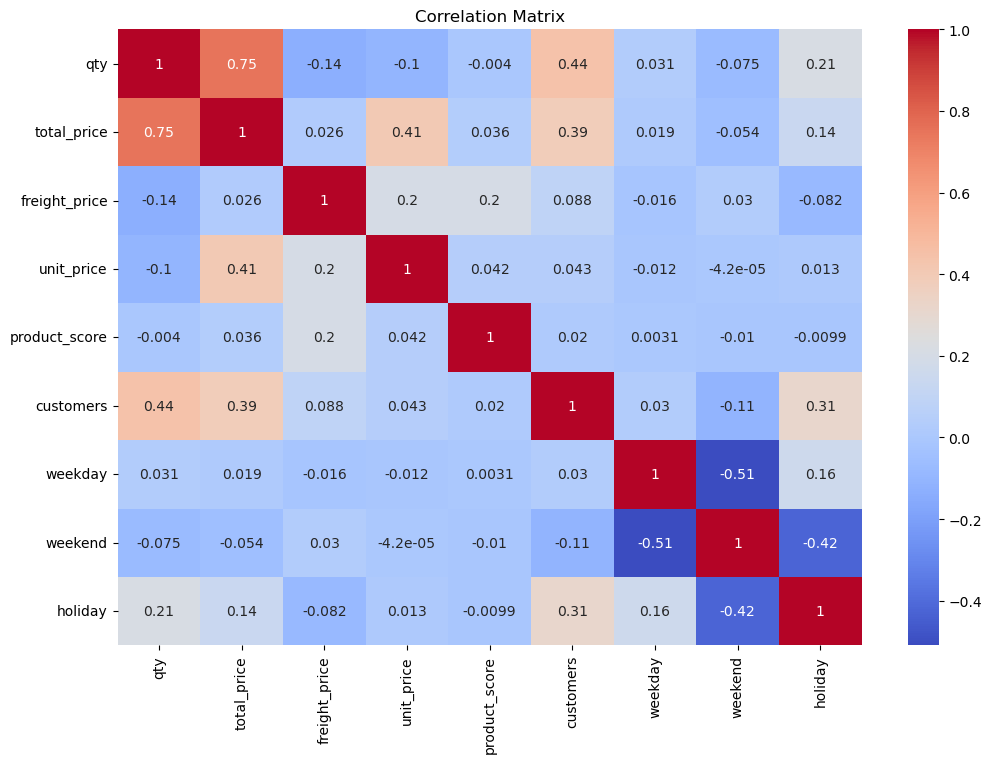

In [33]:
subset_cols = [
    "qty", "total_price", "freight_price", "unit_price", "product_score", "customers", "weekday", "weekend", "holiday"
]
subset_df = df[subset_cols]

# Computing Correlation Matrix
corr_matrix = subset_df.corr()

# Heatmap of correlation matrix
plt.figure(figsize = (12, 8))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm")
plt.title("Correlation Matrix")
plt.show()

<Figure size 1200x800 with 0 Axes>

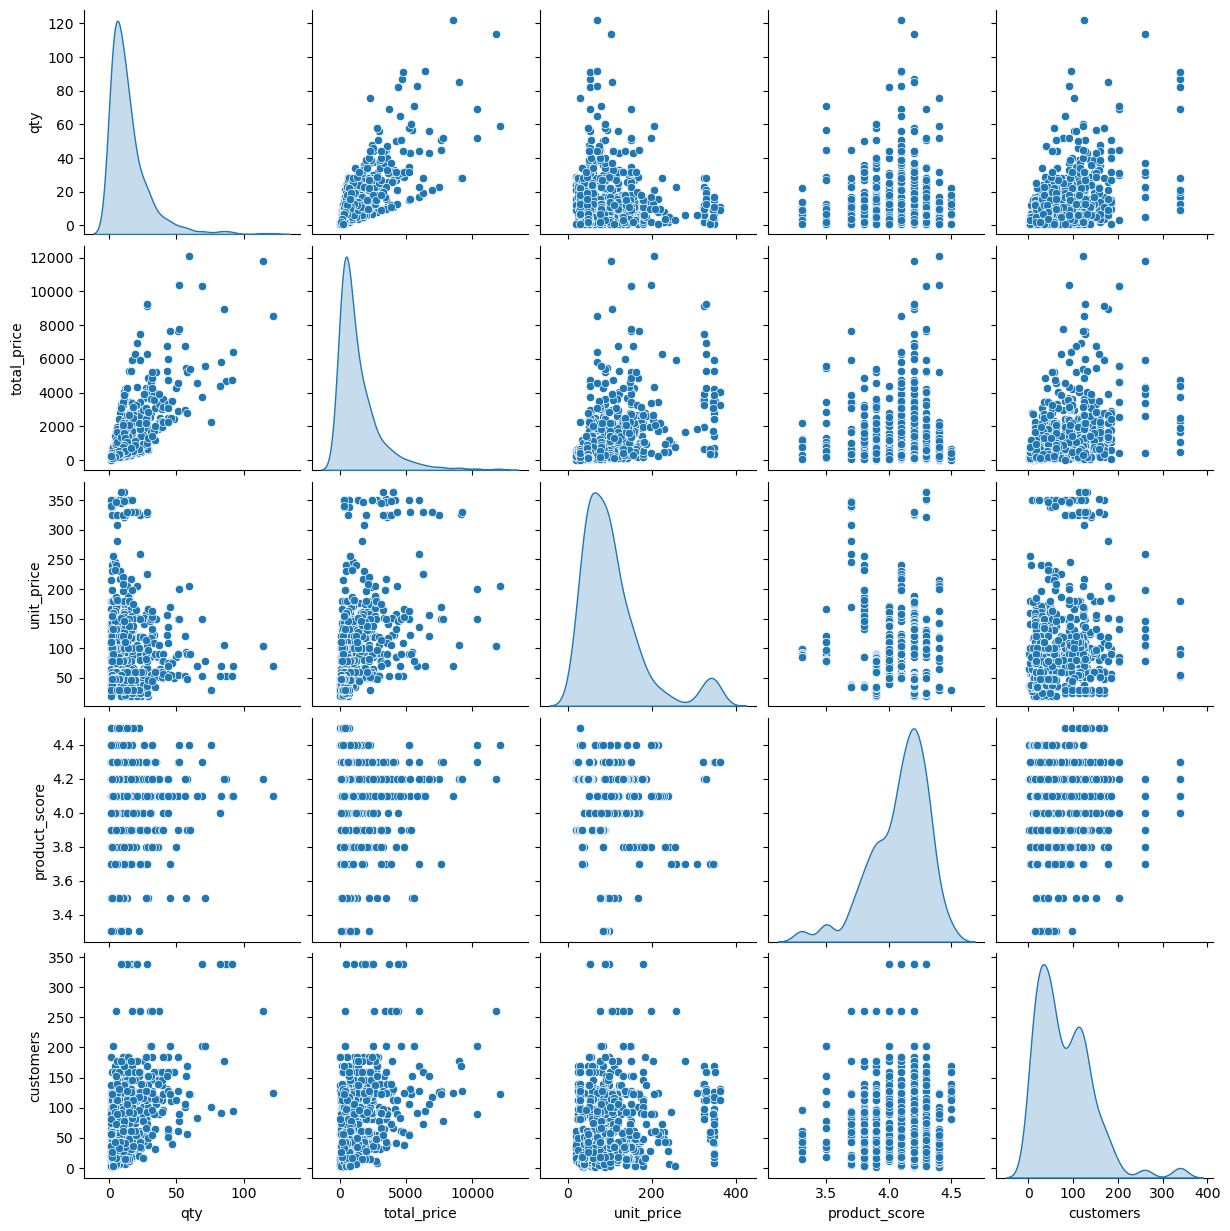

In [34]:
plt.figure(figsize = (12, 8))
sns.pairplot(subset_df, vars = ["qty", "total_price", "unit_price", "product_score", "customers"], diag_kind = "kde")
plt.show()

# Product Category Name VS Total Price

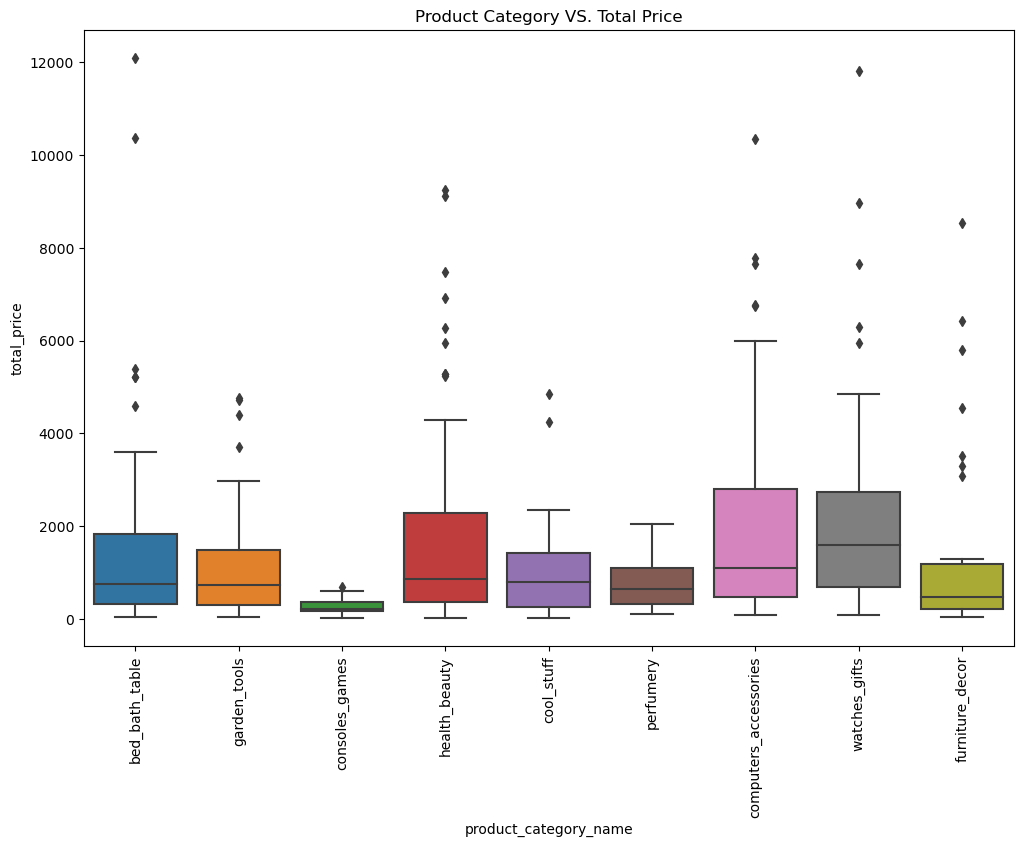

In [35]:
plt.figure(figsize = (12, 8))
sns.boxplot(x = "product_category_name", y = "total_price", data = df)
plt.title("Product Category VS. Total Price")
plt.xticks(rotation = 90)
plt.show()

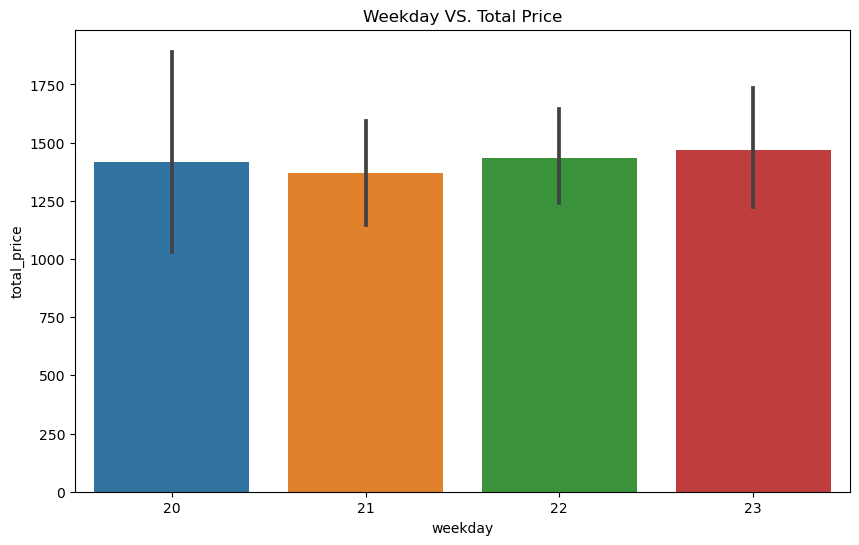

In [36]:
plt.figure(figsize = (10, 6))
sns.barplot(x = "weekday", y = "total_price", data = df)
plt.title("Weekday VS. Total Price")
plt.show()

# Holiday VS Total Price

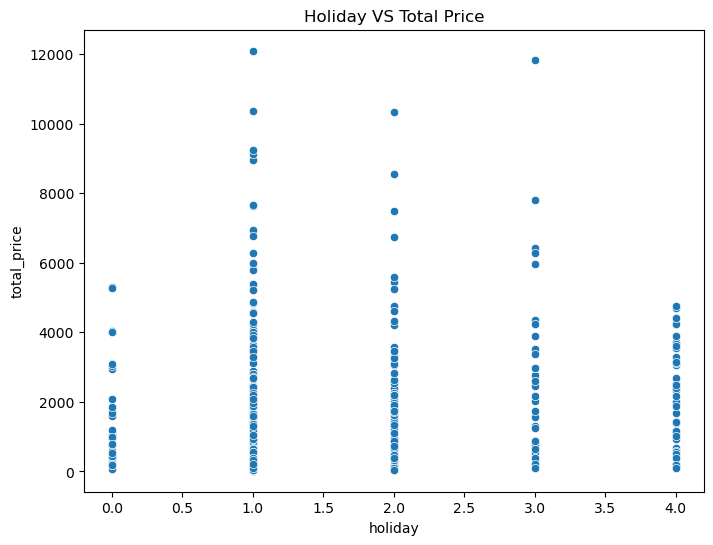

In [37]:
plt.figure(figsize = (8, 6))
sns.scatterplot(x = "holiday", y = "total_price", data = df)
plt.title("Holiday VS Total Price")
plt.show()

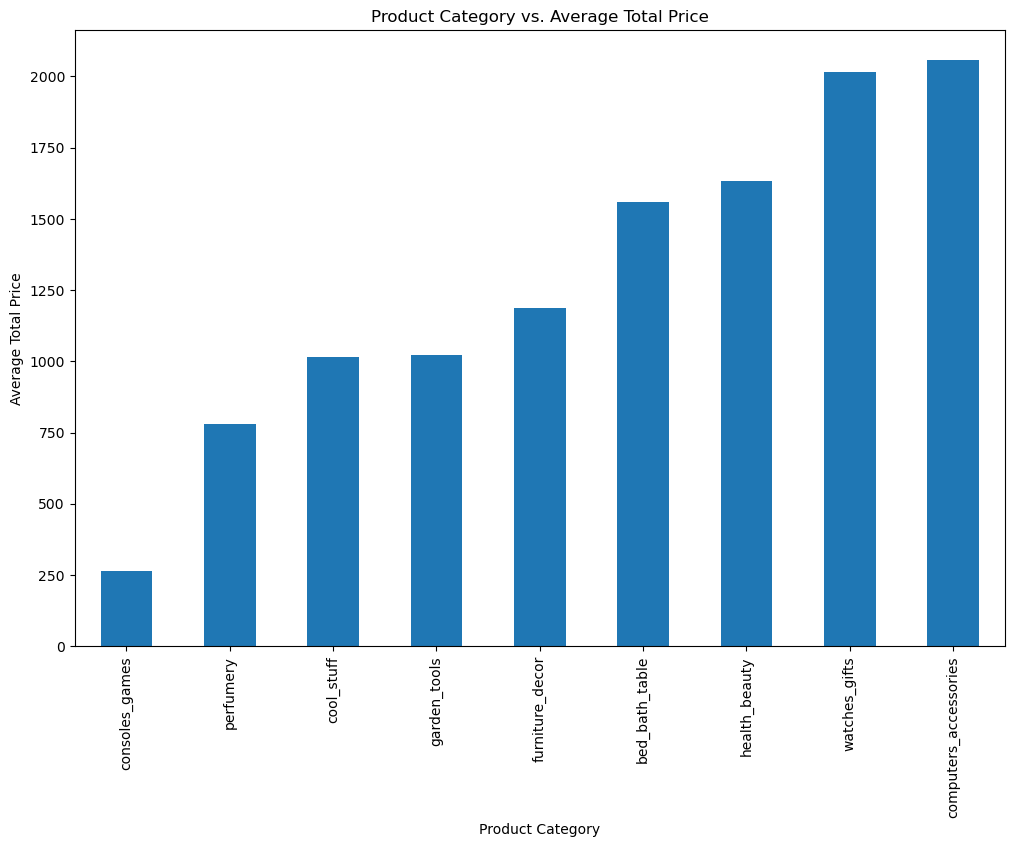

In [38]:
# Bar plot of product_category_name vs. total_price
plt.figure(figsize=(12, 8))
df.groupby('product_category_name')['total_price'].mean().sort_values().plot(kind='bar')
plt.title('Product Category vs. Average Total Price')
plt.xlabel('Product Category')
plt.ylabel('Average Total Price')
plt.xticks(rotation=90)
plt.show()


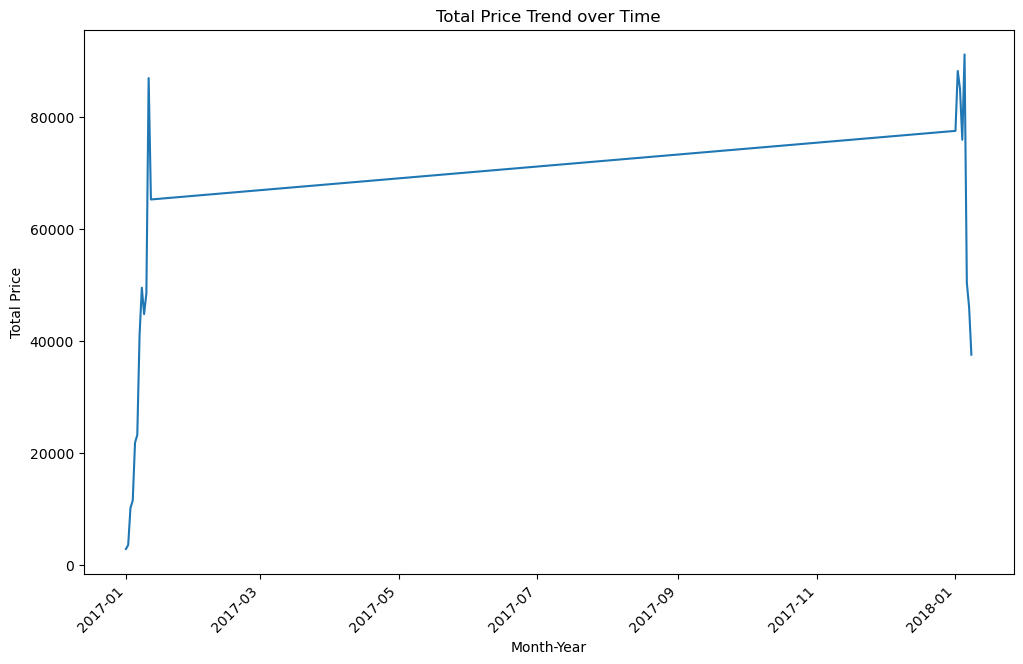

In [39]:
# Line plot of month_year vs. total_price
plt.figure(figsize=(12, 8))
df.groupby('month_year')['total_price'].sum().plot(kind='line')
plt.title('Total Price Trend over Time')
plt.xlabel('Month-Year')
plt.ylabel('Total Price')
plt.xticks(rotation=45)
plt.show()


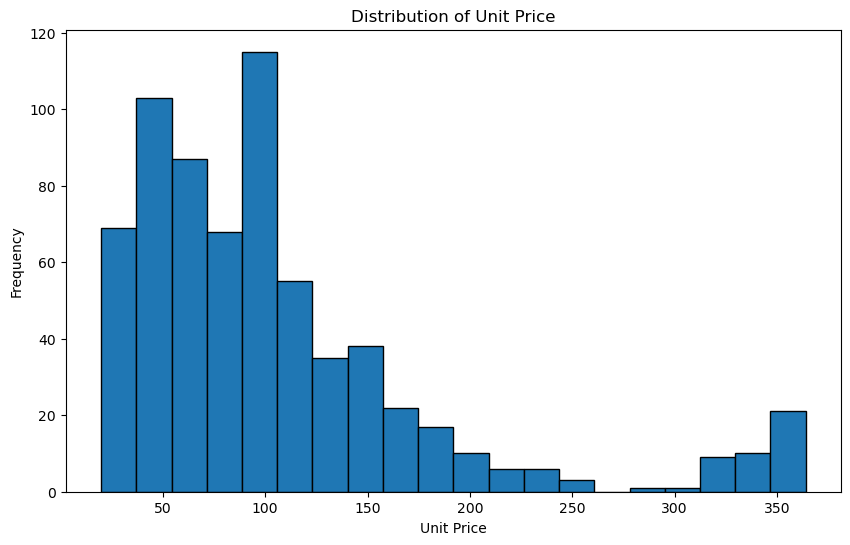

In [40]:
# Histogram of unit_price
plt.figure(figsize=(10, 6))
plt.hist(df['unit_price'], bins=20, edgecolor='k')
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()

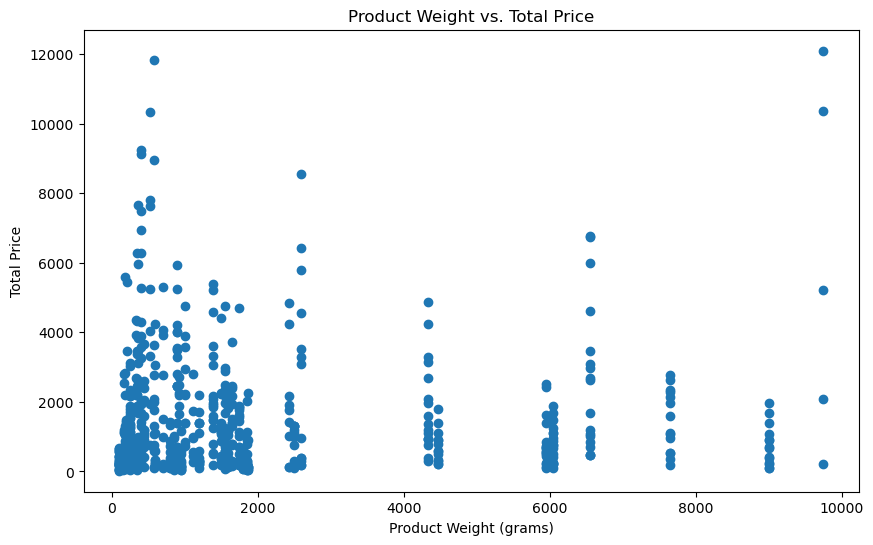

In [41]:
# Scatter plot of product_weight_g vs. total_price
plt.figure(figsize=(10, 6))
plt.scatter(df['product_weight_g'], df['total_price'])
plt.title('Product Weight vs. Total Price')
plt.xlabel('Product Weight (grams)')
plt.ylabel('Total Price')
plt.show()